In [7]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import traceback
%matplotlib inline

#Загружаем файл hr.csv
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
# Рассчитываем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [11]:
import traceback
column_stat={}
column_data=['satisfaction_level',
             'last_evaluation',
             'number_project',
             'average_montly_hours',
             'time_spend_company',
             'Work_accident',
             'left',
             'promotion_last_5years',
             'department',
             'salary'
            ]
index_data=[]
mean_data=[]
median_data=[]
mode_data=[]
max_data=[]
min_data=[]
pstdev_data=[]
for name in column_data:
    if data[name].dtypes!=object:
        index_data.append(name)
        mean_data.append(statistics.mean(data[name]))
        median_data.append(statistics.median(data[name]))
        try:
            mode_data.append(statistics.mode(data[name]))
        except:
            check={}
            for i in data[name]:
                if i not in check:
                    check[i] = 1
                else:
                    check[i] += 1
            maxp = 0
            mode_duration = None
            for k, v in check.items():
                if maxp < v:
                    maxp = v
                    mode_duration = k
            mode_data.append(mode_duration)
        max_data.append(max(data[name]))
        min_data.append(min(data[name]))
        pstdev_data.append(statistics.pstdev(data[name]))
column_stat.setdefault('mean', mean_data)
column_stat.setdefault('median', median_data)
column_stat.setdefault('mode', mode_data)
column_stat.setdefault('max', max_data)
column_stat.setdefault('min', min_data)
column_stat.setdefault('pstdev', pstdev_data)
print(column_stat)

{'mean': [0.6128335222348157, 0.7161017401160077, 3.80305353690246, 201.0503366891126, 3.498233215547703, 0.1446096406427095, 0.2380825388359224, 0.021268084538969265], 'median': [0.64, 0.72, 4, 200, 3, 0, 0, 0], 'mode': [0.1, 0.55, 4, 135, 3, 0, 0, 0], 'max': [1.0, 1.0, 7, 310, 10, 1, 1, 1], 'min': [0.09, 0.36, 2, 96, 2, 0, 0, 0], 'pstdev': [0.2486223626820733, 0.1711634045107436, 1.2325512654823438, 49.94143446256218, 1.4600875552715114, 0.3517068274513532, 0.42590990072709495, 0.14427665479561314]}


In [12]:
stat_frame=pd.DataFrame(column_stat, index=index_data)
stat_frame

,mean,median,mode,max,min,pstdev
satisfaction_level,0.612834,0.64,0.10,1.0,0.09,0.248622
last_evaluation,0.716102,0.72,0.55,1.0,0.36,0.171163
number_project,3.803054,4.00,4.00,7.0,2.00,1.232551
average_montly_hours,201.050337,200.00,135.00,310.0,96.00,49.941434
time_spend_company,3.498233,3.00,3.00,10.0,2.00,1.460088
Work_accident,0.144610,0.00,0.00,1.0,0.00,0.351707
left,0.238083,0.00,0.00,1.0,0.00,0.425910
promotion_last_5years,0.021268,0.00,0.00,1.0,0.00,0.144277


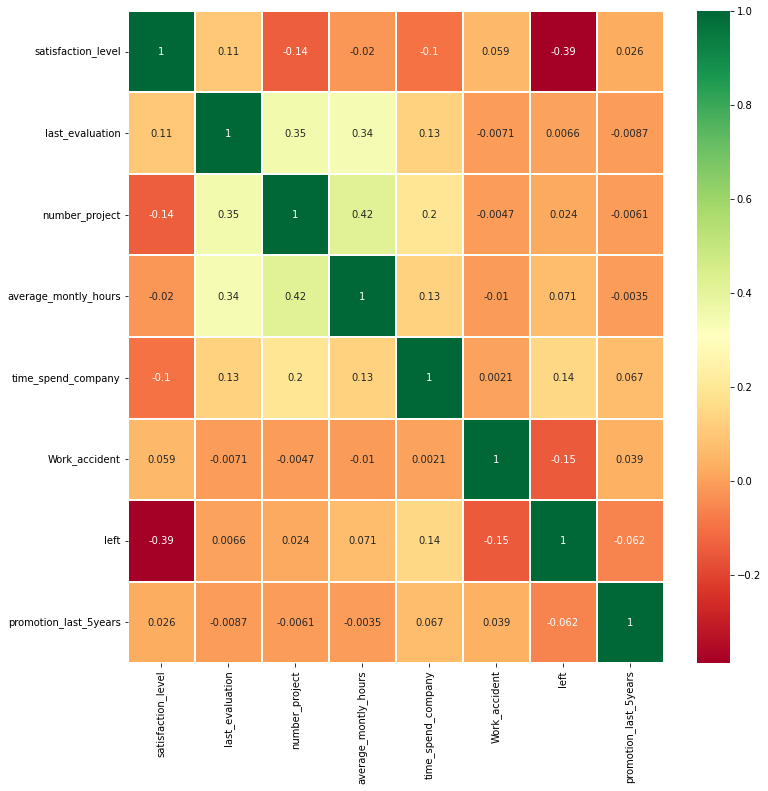

In [13]:
#Рассчитаем и визуализируем корреляционную матрицу для переменных.
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# Переменные "last_evaluation" и "average_montly_hours" зависят от "Номера проекта" ("number_project") и имеею положительную корреляцию, в то же время "Уровень удовлетворености"("satisfaction_level") иммеет отрицательную корреляцию с "Сотрудниками, которые работают сейчас"
# Визуализируем несколько взаимосвязей между переменными.

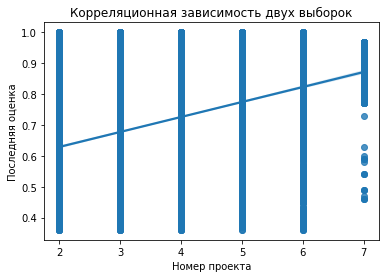

In [14]:
number_project = data['number_project']
last_evaluation = data['last_evaluation']
sns.regplot(x= number_project, y=last_evaluation, data=data, fit_reg=True)
plt.xlabel('Номер проекта')
plt.ylabel('Последняя оценка')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

In [ ]:
# На проекте №7 сотрудники получают более высокие оценки

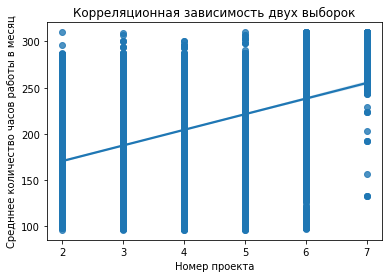

In [15]:
number_project = data['number_project']
average_montly_hours = data['average_montly_hours']
sns.regplot(x= number_project, y=average_montly_hours, data=data, fit_reg=True)
plt.xlabel('Номер проекта')
plt.ylabel('Средннее количество часов работы в месяц')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

In [ ]:
# По графику видно, что чем выше номер проекта, тем больше времени на него требуется

In [ ]:
# Проверим с помощью t-test  взаимосвязи между несколькими переменными.

In [16]:
satisfaction_level=data['satisfaction_level']
last_evaluation=data['last_evaluation']
stats.ttest_ind(satisfaction_level, last_evaluation)

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

<ipython-input-17-099199186753>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(satisfaction_level)
<ipython-input-17-099199186753>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(last_evaluation)


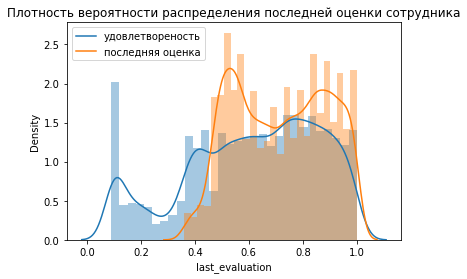

In [17]:
sns.distplot(satisfaction_level)
sns.distplot(last_evaluation)
plt.title('Плотность вероятности распределения последней оценки сотрудника')
plt.legend(['удовлетвореность', 'последняя оценка'])
plt.show()

In [ ]:
# "Последняя оценка" ("last_evaluation") зависит от степени удовлетворености сотрудника

In [23]:
# Рассчитаем сколько работников работает в каждом департаменте
def groupby_function(data):
    return data.satisfaction_level.count()
print('Распределение сотрудников по департаментам : \n', data.groupby('department').apply(groupby_function))

Распределение сотрудников по департаментам : 
 department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


In [ ]:
# Наибольшее число сотрудников в департаменте продаж

In [ ]:
# Посмотрим распределение сотрудников по зарплатам

In [24]:
def groupby_count(data):
    return data.satisfaction_level.count()
df=data.groupby('salary').apply(groupby_count)
df

salary
high      1237
low       7316
medium    6446
dtype: int64

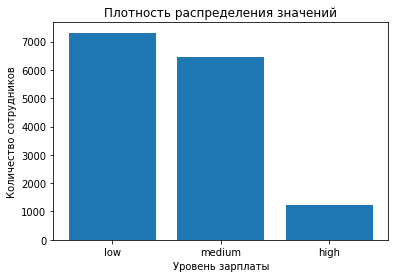

In [25]:
df=sorted(df, reverse=True)
r=['low', 'medium' ,'high']
plt.bar(r, df)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Плотность распределения значений')
plt.show()

In [ ]:
# Посмотрим распределение сотрудников по зарплатам в каждом департаменте

In [26]:
sales_data=data.groupby(['department','salary']).apply(groupby_count).reset_index()
sales_data.columns=['department', 'salary', 'count']
sales_data

,department,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


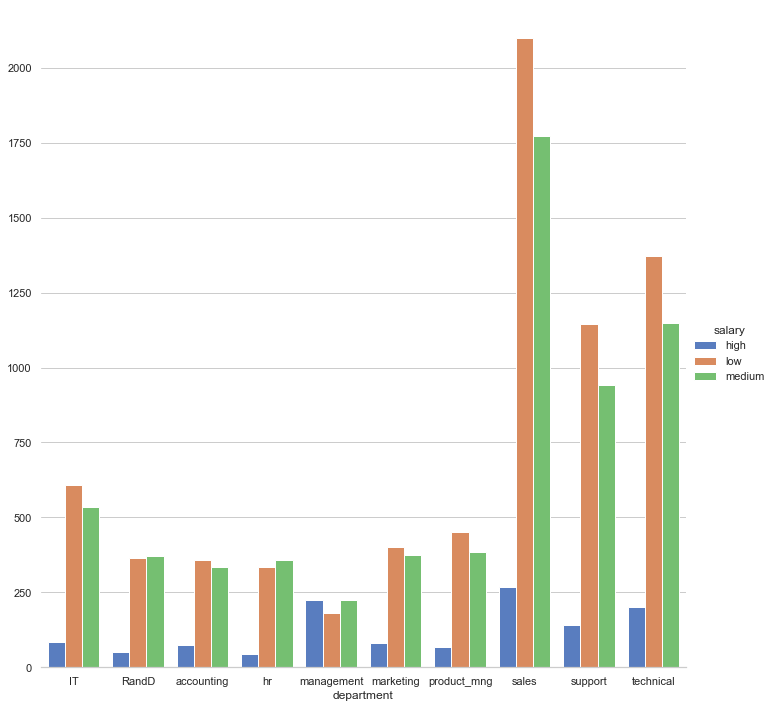

In [28]:
# Визуализируем данные
tmp = data.groupby(['salary', 'department']).count().reset_index()

sns.set(style="whitegrid")

g = sns.catplot(x="department", y = 'satisfaction_level', hue="salary", data=tmp,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("")

In [ ]:
 # Мы видим, как некоторые департаменты выбиваются из общей статистики уровня доходов

In [ ]:
# Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени,чем с низким

In [50]:
salary_h=data[data['salary']=="high"]['average_montly_hours']
salary_l=data[data['salary']=="low"]['average_montly_hours']
stats.ttest_ind(salary_h, salary_l)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

<ipython-input-53-e65870a3a627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_h)
<ipython-input-53-e65870a3a627>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_l)


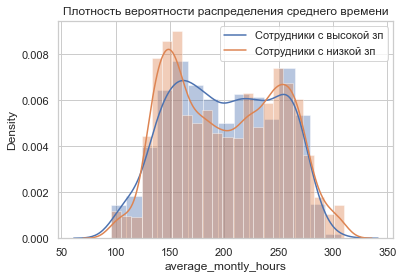

In [53]:
sns.distplot(salary_h)
sns.distplot(salary_l)
plt.title('Плотность вероятности распределения среднего времени')
plt.legend(['Сотрудники с высокой зп', 'Сотрудники с низкой зп'])
plt.show()

In [ ]:
# Размер заработной платы явно не зависит от количества рабочего времени

In [ ]:
# Рассчитаем показатели среди уволившихся и неуволившихся сотрудников

In [62]:
# Доля сотрудников с повышением за последние 5 лет
data.groupby('left')["promotion_last_5years"].agg(['mean'])


,mean
left,
0,0.026251
1,0.005321


In [ ]:
# Мы видим, что доля сотрудников с повышением за последние 5 лет среди работающих - 2.62%, уволившихся - 0.53%

In [97]:
# Средняя степень удовлетворенности
data.groupby('left')["satisfaction_level"].agg(['mean'])

,mean
left,
0,0.666810
1,0.440098


In [ ]:
# Мы видим, что cредняя степень удовлетворенности среди работающих - 66.68%, уволившихся - 44.01%

In [58]:
# Разделим данные на тестовую и обучающую выборки
# Исключаем, согласно условию, данные по департаментам и зп (Department & Salary)
cols = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "left", "promotion_last_5years"]
data = pd.read_csv('HR.csv', usecols=cols)
data1 = data.drop('left', 1)
data2 = data['left']
data1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [59]:
data2

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [60]:
# Разделяем выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data2, random_state=42)

In [61]:
# Импортируем LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [62]:
# Обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
# Строим прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [65]:
# Выводим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
